In [1]:
import os
import numpy as np
import networkx as nx
import pandas as pd
from ripser import ripser
import matplotlib.pyplot as plt

In [2]:
upto = -1
year = '1978'
data_loc = '/home/gebhart/projects/rfunklab/data/temporal/aps/1_1/collaboration/{}.csv'.format(year)

In [3]:
collab_graph = nx.Graph()

In [4]:
collab_df = pd.read_csv(data_loc, header=0)

In [5]:
collab_df.shape

(42519, 3)

In [6]:
for idx, row in collab_df.iterrows():
    collab_graph.add_edge(row['author_id_a'], row['author_id_b'], weight=row['papers'])

In [7]:
len(collab_graph.nodes())

16769

In [8]:
cgm = nx.to_scipy_sparse_matrix(collab_graph)

In [9]:
rips = ripser(cgm, distance_matrix=True, maxdim=5)

In [10]:
rips

{'dgms': [array([[ 0.,  1.],
         [ 0.,  1.],
         [ 0.,  1.],
         ...,
         [ 0., inf],
         [ 0., inf],
         [ 0., inf]]), array([[3., 4.],
         [3., 4.],
         [3., 4.],
         ...,
         [1., 2.],
         [1., 2.],
         [1., 4.]]), array([[ 5., 10.],
         [ 4.,  5.],
         [ 4.,  5.],
         [ 4.,  6.],
         [ 4.,  6.],
         [ 4.,  5.],
         [ 4.,  5.],
         [ 3.,  4.],
         [ 3.,  6.],
         [ 3.,  4.],
         [ 3.,  4.],
         [ 3.,  4.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [ 3.,  5.],
         [

In [16]:
def plot_diagram(diagram, title=''):
    fig, ax = plt.subplots()
    if diagram.size > 0:
        d = diagram[~np.isinf(diagram[:,1])]
        print(d.shape)
        if d.shape[0] > 0:
            ax.scatter(d[:,0], d[:,1], s=25, c=d[:,0]**2 - d[:,1], cmap=plt.cm.coolwarm, zorder=10)
            lims = [
                np.min(d[:,0]-1),  # min of both axes
                np.max(d[:,1]+1),  # max of both axes
            ]

            # now plot both limits against eachother
            ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
            ax.set_xlim(lims)
            ax.set_ylim(lims)
    ax.set_aspect('equal')
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(title)

(12978, 2)
(3016, 2)
(115, 2)
(0, 2)
(0, 2)


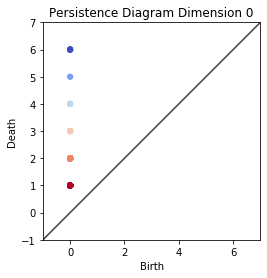

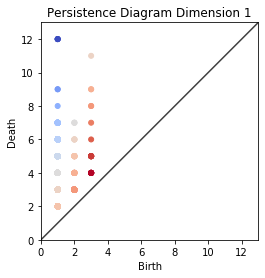

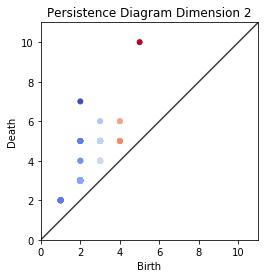

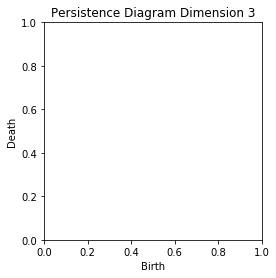

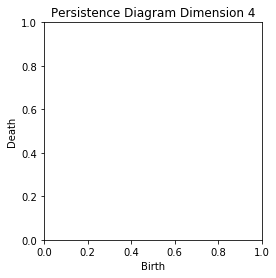

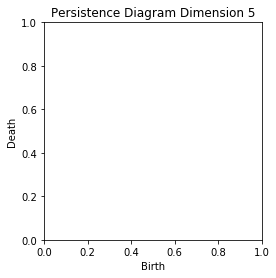

In [17]:
for i in range(len(rips['dgms'])):
    plot_diagram(rips['dgms'][i], title='Persistence Diagram Dimension {}'.format(i))

In [15]:
for r in rips['dgms']:
    print(r.shape[0])

16769
3469
115
12857
218253
0
